# How random are you?
Lets test if some of these filter are random

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2 as cv

In [2]:
#test a uniform distributions first
test_image = np.random.randint(low = 0, high = 255, size = (174, 174, 3))
test_imageunit8 = test_image.astype(np.uint8)
plt.imsave('real_random.png',test_imageunit8)

#test all black 
test_image = np.full((174,174,3),254)
test_imageunit8 = test_image.astype(np.uint8)
plt.imsave('zeros.png',test_imageunit8)

In [3]:
filter_path = '../input/vgg16-filter-activations/filterActivations/block4_conv1/filter-0.png'

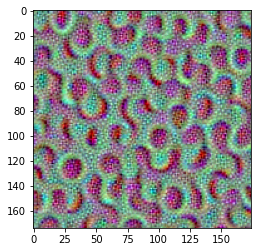

In [4]:
img = mpimg.imread(filter_path)
imgplot = plt.imshow(img)
plt.show()

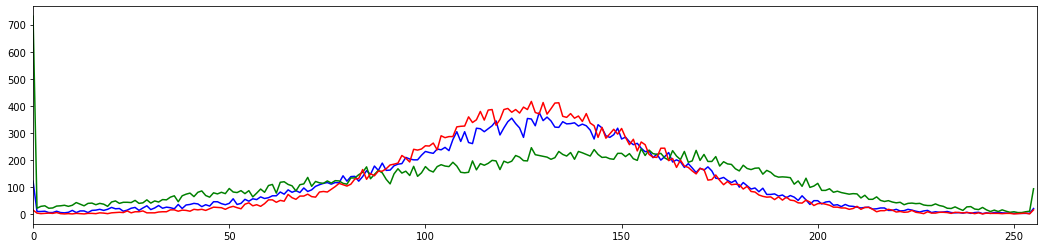

In [5]:
img = cv.imread(filter_path)

color = ('b','g','r')
plt.figure(figsize=(18,4))
for i,col in enumerate(color):
    histr = cv.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

In [6]:
histrb = cv.calcHist([img],[0],None,[256],[0,256])
histrg = cv.calcHist([img],[1],None,[256],[0,256])
histrr = cv.calcHist([img],[2],None,[256],[0,256])

In [7]:
def mean_sub(x,mean):
  return abs(x - mean)
vmean_sub = np.vectorize(mean_sub)

In [8]:
mean = np.mean(histrb)

In [9]:
bsub = vmean_sub(histrb,mean)
gsub = vmean_sub(histrg,mean)
rsub = vmean_sub(histrr,mean)

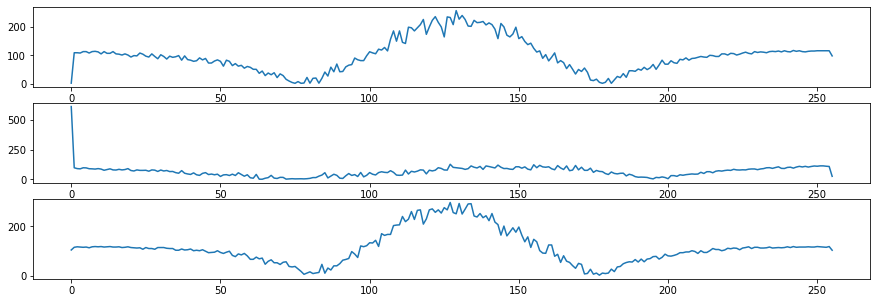

In [10]:
f, axarr = plt.subplots(3, figsize=(15,5))
axarr[0].plot(bsub)
axarr[1].plot(gsub)
axarr[2].plot(rsub)

In [11]:
final_score = np.mean([np.mean(bsub),np.mean(gsub),np.mean(rsub)])

In [12]:
# 1 is uniform color, 0 is uniform distribution
print(final_score/235.6073)

0.39410339872878514


# Lets calc the score for every filter

In [13]:
def mean_sub(x,mean):
  return abs(x - mean)
vmean_sub = np.vectorize(mean_sub)

def calc_score(path):
  #load image in opencv
  img = cv.imread(path)
  #calc the three histograms 
  histrb = cv.calcHist([img],[0],None,[256],[0,256])
  histrg = cv.calcHist([img],[1],None,[256],[0,256])
  histrr = cv.calcHist([img],[2],None,[256],[0,256])
  #calc che mean (shape dependent)
  mean = np.mean(histrb)
  #subtract the mean to all values of the histogram
  bsub = vmean_sub(histrb,mean)
  gsub = vmean_sub(histrg,mean)
  rsub = vmean_sub(histrr,mean)
  #the final score is the mean of the found value,
  #i.e how far away you are from uniform, for all three
  final_score = np.mean([np.mean(bsub),np.mean(gsub),np.mean(rsub)])
  return final_score/235.6073

In [14]:

from os import listdir
from os.path import isfile, join
#get all the paths 
folders = ["../input/vgg16-filter-activations/filterActivations/block1_conv1",
          "../input/vgg16-filter-activations/filterActivations/block1_conv2",
          "../input/vgg16-filter-activations/filterActivations/block2_conv1",
          "../input/vgg16-filter-activations/filterActivations/block2_conv2",
          "../input/vgg16-filter-activations/filterActivations/block3_conv1",
          "../input/vgg16-filter-activations/filterActivations/block3_conv2",
          "../input/vgg16-filter-activations/filterActivations/block3_conv3",
          "../input/vgg16-filter-activations/filterActivations/block4_conv1",
          "../input/vgg16-filter-activations/filterActivations/block4_conv2",
          "../input/vgg16-filter-activations/filterActivations/block4_conv3",
          "../input/vgg16-filter-activations/filterActivations/block5_conv1",
          "../input/vgg16-filter-activations/filterActivations/block5_conv2",
          "../input/vgg16-filter-activations/filterActivations/block5_conv3"]
result = []
for layer in folders:
    mypath = layer
    paths = [f for f in listdir(mypath) if isfile(join(mypath, f))]
    scores = []
    for path in paths:
        scores.append(calc_score(mypath + "/" + path))
    result.append(scores)

(0.0, 1.0)

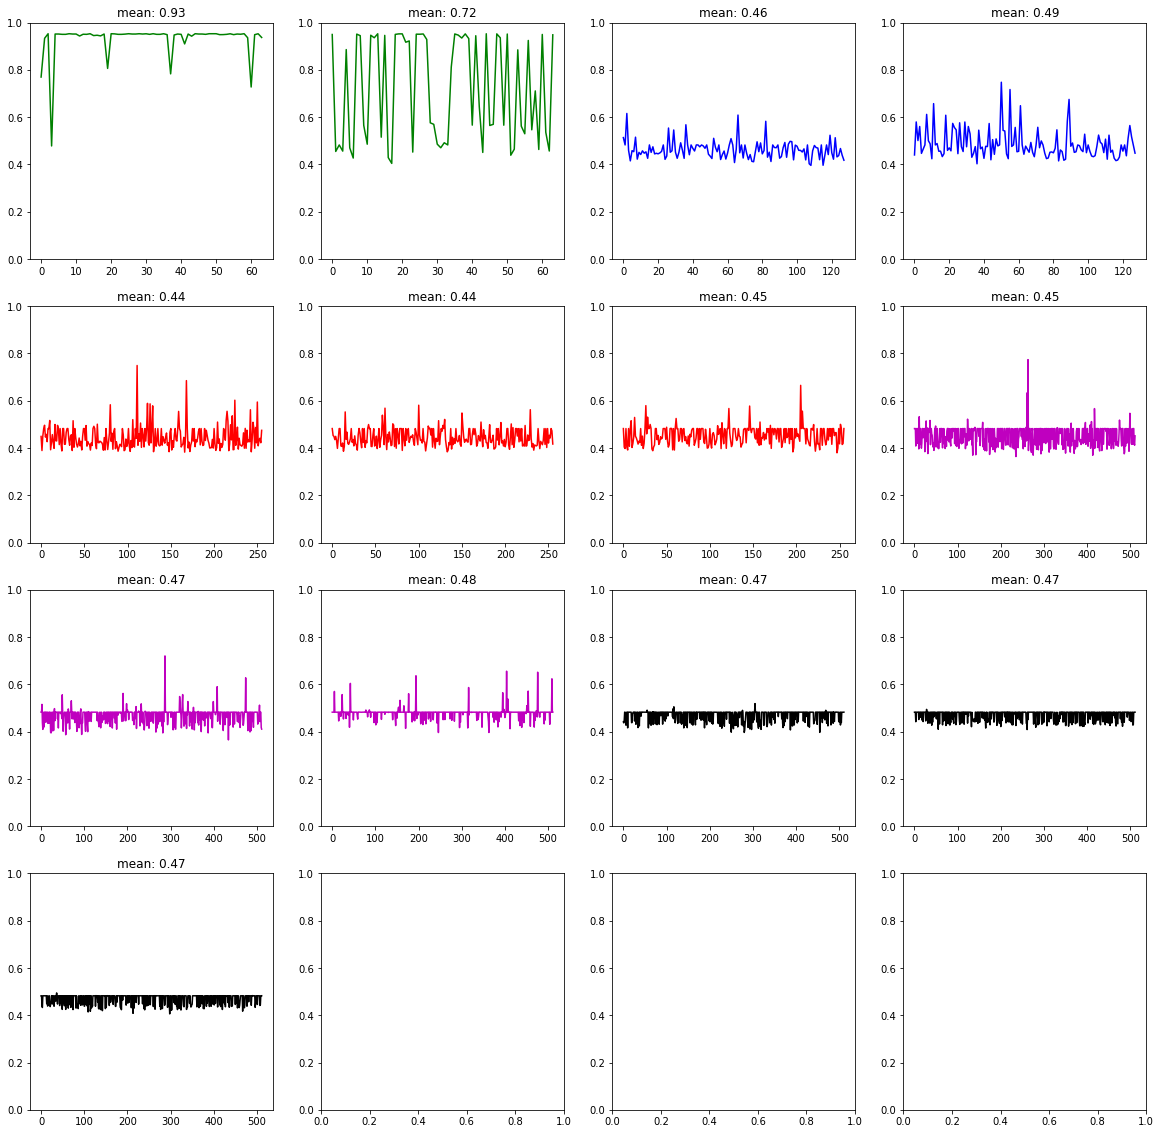

In [15]:
f, axarr = plt.subplots(4,4, figsize=(20,20))
axarr[0,0].plot(result[0],color="g")
axarr[0,0].set_title("mean: " + str(np.round(np.mean(result[0]),2)))
axarr[0,1].plot(result[1],color="g")
axarr[0,1].set_title("mean: " + str(np.round(np.mean(result[1]),2)))
axarr[0,2].plot(result[2],color="b")
axarr[0,2].set_title("mean: " + str(np.round(np.mean(result[2]),2)))
axarr[0,3].plot(result[3],color="b")
axarr[0,3].set_title("mean: " + str(np.round(np.mean(result[3]),2)))
axarr[1,0].plot(result[4],color="r")
axarr[1,0].set_title("mean: " + str(np.round(np.mean(result[4]),2)))
axarr[1,1].plot(result[5],color="r")
axarr[1,1].set_title("mean: " + str(np.round(np.mean(result[5]),2)))
axarr[1,2].plot(result[6],color="r")
axarr[1,2].set_title("mean: " + str(np.round(np.mean(result[6]),2)))
axarr[1,3].plot(result[7],color="m")
axarr[1,3].set_title("mean: " + str(np.round(np.mean(result[7]),2)))
axarr[2,0].plot(result[8],color="m")
axarr[2,0].set_title("mean: " + str(np.round(np.mean(result[8]),2)))
axarr[2,1].plot(result[9],color="m")
axarr[2,1].set_title("mean: " + str(np.round(np.mean(result[9]),2)))
axarr[2,2].plot(result[10],color="k")
axarr[2,2].set_title("mean: " + str(np.round(np.mean(result[10]),2)))
axarr[2,3].plot(result[11],color="k")
axarr[2,3].set_title("mean: " + str(np.round(np.mean(result[11]),2)))
axarr[3,0].plot(result[12],color="k")
axarr[3,0].set_title("mean: " + str(np.round(np.mean(result[12]),2)))
axarr[0,0].set_ylim([0, 1])
axarr[0,1].set_ylim([0, 1])
axarr[0,2].set_ylim([0, 1])
axarr[0,3].set_ylim([0, 1])
axarr[1,0].set_ylim([0, 1])
axarr[1,1].set_ylim([0, 1])
axarr[1,2].set_ylim([0, 1])
axarr[1,3].set_ylim([0, 1])
axarr[2,0].set_ylim([0, 1])
axarr[2,1].set_ylim([0, 1])
axarr[2,2].set_ylim([0, 1])
axarr[2,3].set_ylim([0, 1])
axarr[3,0].set_ylim([0, 1])